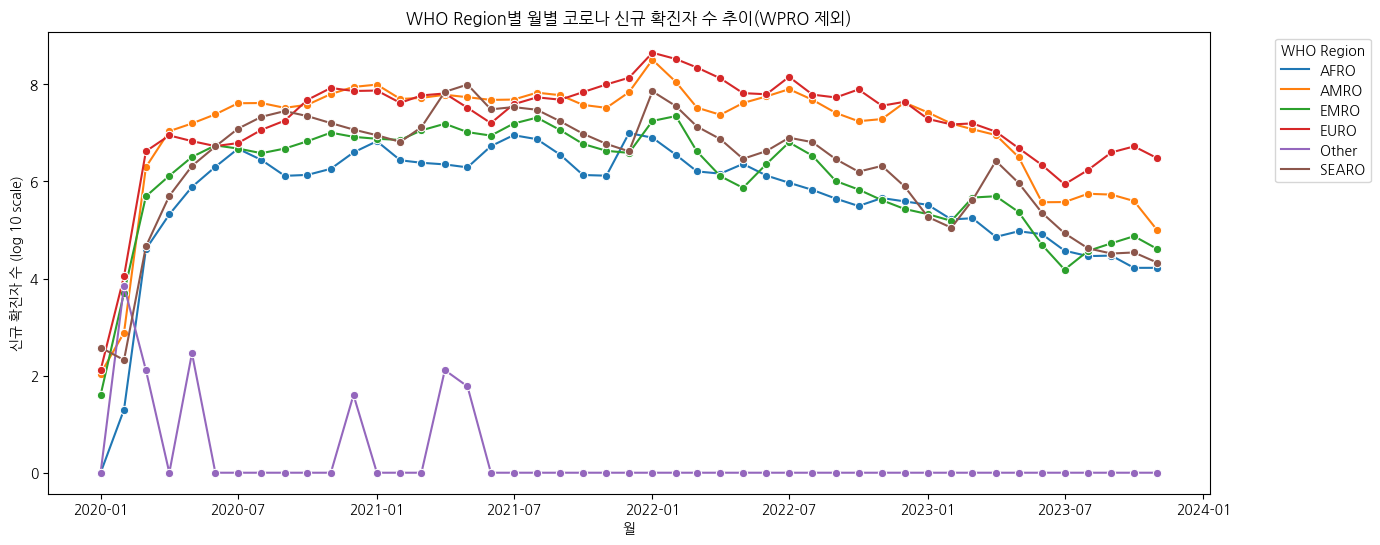

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import warnings

# 경고 메시지 숨기기
warnings.filterwarnings("ignore")
# 한글폰트 안깨지게 하기
mpl.rcParams['font.family'] = 'NanumGothic'

# CSV 파일을 읽어오기
file_path = './data/COVID19_global_data.csv'
df = pd.read_csv(file_path)

# Date_reported를 날짜로 변환
df['Date_reported'] = pd.to_datetime(df['Date_reported'])

# Date_reported를 월별로 변환하여 새로운 열 추가
df['Date_reported_month'] = df['Date_reported'].dt.to_period('M')

# 월별로 New_cases의 누적 합 계산
monthly_data = df.groupby(['WHO_region', 'Date_reported_month'])['New_cases'].sum().reset_index()

# Date_reported_month를 datetime 형식으로 변환
monthly_data['Date_reported_month'] = pd.to_datetime(monthly_data['Date_reported_month'].astype(str))

# WPRO를 제외한 데이터 선택
filtered_data = monthly_data[monthly_data['WHO_region'] != 'WPRO']

# 로그 변환
filtered_data['Log_New_cases'] = filtered_data['New_cases'].apply(lambda x: 0 if x == 0 else 1 + np.log10(x))

# 그래프 크기 설정
plt.figure(figsize=(15,6))

# seaborn의 lineplot 함수를 사용하여 line plot 그리기
sns.lineplot(data=filtered_data, x='Date_reported_month', y='Log_New_cases', hue='WHO_region', marker='o')

# 그래프 제목과 축 레이블 설정
plt.title('WHO Region별 월별 코로나 신규 확진자 수 추이(WPRO 제외)')
plt.xlabel('월')
plt.ylabel('신규 확진자 수 (log 10 scale)')

# 범례 위치 설정
plt.legend(title='WHO Region', bbox_to_anchor=(1.05, 1), loc='upper left')

# 그래프 표시

plt.show()

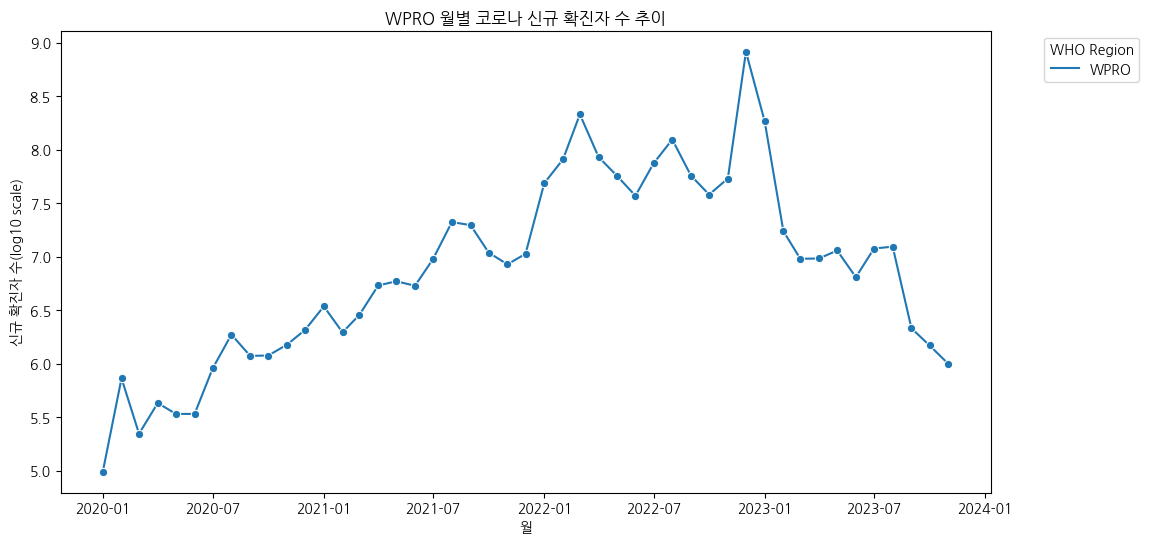

In [33]:

# 월별로 New_cases의 누적 합 계산
monthly_data = df.groupby(['WHO_region', 'Date_reported_month'])['New_cases'].sum().reset_index()

# Date_reported_month를 datetime 형식으로 변환
monthly_data['Date_reported_month'] = pd.to_datetime(monthly_data['Date_reported_month'].astype(str))

# WPRO를 제외한 데이터 선택
filtered_data = monthly_data[monthly_data['WHO_region'] == 'WPRO']

# 로그 변환
filtered_data['Log_New_cases'] = filtered_data['New_cases'].apply(lambda x: 0 if x == 0 else 1 + np.log10(x))

# 그래프 크기 설정
plt.figure(figsize=(12,6))

# seaborn의 lineplot 함수를 사용하여 line plot 그리기
sns.lineplot(data=filtered_data, x='Date_reported_month', y='Log_New_cases', hue='WHO_region', marker='o')

# 그래프 제목과 축 레이블 설정
plt.title('WPRO 월별 코로나 신규 확진자 수 추이')
plt.xlabel('월')
plt.ylabel('신규 확진자 수(log10 scale)')


# 범례 위치 설정
plt.legend(title='WHO Region', bbox_to_anchor=(1.05, 1), loc='upper left')

# 그래프 표시
plt.show()

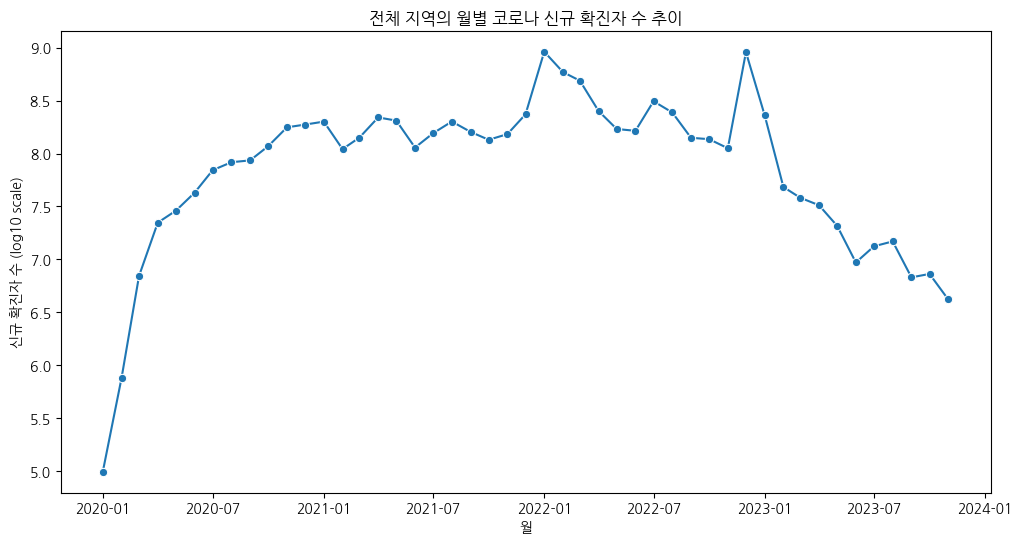

In [35]:

# Date_reported_month를 datetime 형식으로 변환
monthly_data['Date_reported_month'] = pd.to_datetime(monthly_data['Date_reported_month'].astype(str))

# 모든 지역의 월별 코로나 신규 확진자 수 합산
total_monthly_cases = monthly_data.groupby('Date_reported_month')['New_cases'].sum().reset_index()

# 로그 변환
total_monthly_cases['Log_New_cases'] = total_monthly_cases['New_cases'].apply(lambda x: 0 if x == 0 else 1 + np.log10(x))

# 그래프 크기 설정
plt.figure(figsize=(12, 6))

# seaborn의 lineplot 함수를 사용하여 line plot 그리기
sns.lineplot(data=total_monthly_cases, x='Date_reported_month', y='Log_New_cases', marker='o')

# 그래프 제목과 축 레이블 설정
plt.title('전체 지역의 월별 코로나 신규 확진자 수 추이')
plt.xlabel('월')
plt.ylabel('신규 확진자 수 (log10 scale)')

# 그래프 표시
plt.show()